In [1]:
import os

import numpy as np
import operator
#from termcolor import colored
import pandas as pd

import nltk
from nltk.corpus import stopwords
#set(stopwordswords.words('english'))
#from spacy.lang.en import English
#nlp = English()
#import spacy

import matplotlib.pyplot as plt
#import seaborn as sns

import re
import string


import requests
from bs4 import BeautifulSoup

In [2]:
joker = []
with open('joker_reviews.txt') as r:
    line = r.read()
    joker.append(line)
    

In [3]:
joker

['I was a person that saw all the hype and claims of masterpiece as overreacting and overblown excitement for another Joker based film. I thought this looked solid at best and even a bit too pretentious in the trailer, but in here to say I was incredibly wrong. This is a massive achievement of cinema that\'s extremely rare in a day and age of cgi nonsense and reboots. While this is somewhat of a reboot of sorts, the standalone origin tale is impeccable from start to finish and echoes resemblance to the best joker origin comics from the past. Joaquin bleeds, sweats, and cries his every drop into this magnificently dedicated performance. Heath Ledger would be proud. This is undoubtedly the greatest acting performance since Heath\'s joker. The directing and writing is slickly brilliant and the bleak settings and tones are palpable throughout. When this film was over the place was blown away and every audience member was awestruck that they witnessed a film that could still transport them 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words=stopwords, use_idf=True, smooth_idf=True, lowercase=True)
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(joker)

In [16]:
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(joker)

In [17]:
tfidf_vectorizer.get_feature_names()

['10 10',
 '10 cinematography',
 '10 reviews',
 '10 thought',
 '100 bad',
 '2019 one',
 '2019 worst',
 '90 drama',
 'able ponder',
 'absolutely nothing',
 'absolutely think',
 'absurd killing',
 'accomplishes many',
 'account poverty',
 'accurate comic',
 'accurate feel',
 'achievement cinema',
 'acted imaginative',
 'acting amazing',
 'acting cinematography',
 'acting damn',
 'acting directing',
 'acting enjoy',
 'acting impressively',
 'acting managed',
 'acting music',
 'acting need',
 'acting nice',
 'acting people',
 'acting performance',
 'acting plot',
 'action edge',
 'action portrayal',
 'action riddled',
 'actions believe',
 'actions know',
 'actor score',
 'actor took',
 'actors embraced',
 'acts insane',
 'actually joker',
 'adaptation tv',
 'add much',
 'adds suspense',
 'adults willing',
 'affects way',
 'age cgi',
 'ago noticed',
 'albeit loose',
 'alex clockwork',
 'alike disturbed',
 'alike early',
 'almost painful',
 'almost surely',
 'alone among',
 'alone film',
 'a

In [8]:
tfidf_vectorizer_vectors.data.flatten()

array([0.03243042, 0.01621521, 0.03243042, ..., 0.0081076 , 0.0081076 ,
       0.0081076 ])

In [9]:
tfidf_vectorizer_vectors.T.todense()

matrix([[0.03243042],
        [0.0081076 ],
        [0.0081076 ],
        ...,
        [0.01621521],
        [0.0081076 ],
        [0.0081076 ]])

In [18]:
len(tfidf_vectorizer.get_feature_names()), len(tfidf_vectorizer_vectors.T.todense())

(1722, 1722)

In [19]:
df = pd.DataFrame(tfidf_vectorizer_vectors.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=['tfidf'])

In [20]:
df = df.sort_values(by='tfidf', ascending=False)
df

,tfidf
comic book,0.292621
joaquin phoenix,0.250818
heath ledger,0.104507
todd phillips,0.083606
one best,0.062704
...,...
genre exclude,0.020901
genius way,0.020901
genius joaquin,0.020901
gave trying,0.020901


In [13]:
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

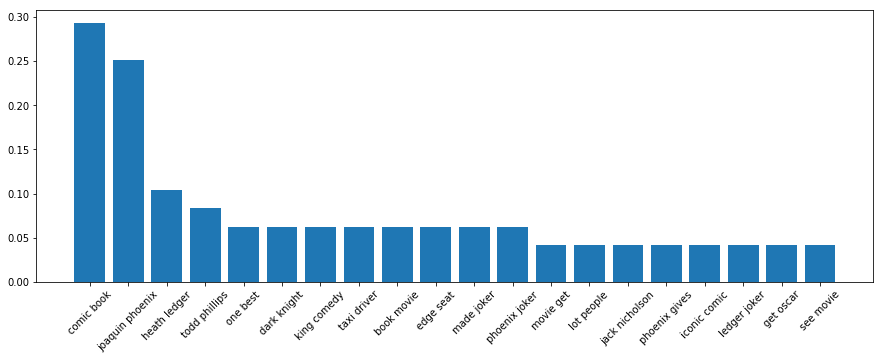

In [21]:
fig = plt.figure(figsize=(15,5))
plt.bar(df.index[:20], df['tfidf'][:20])
plt.xticks(rotation=45)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
word_count = CountVectorizer(lowercase=True, ngram_range=(1,1), stop_words=stopwords)
word_count
word_count_vector = word_count.fit_transform(joker)
word_count_vector

<1x892 sparse matrix of type '<class 'numpy.int64'>'
	with 892 stored elements in Compressed Sparse Row format>

In [28]:
word_count.get_feature_names()

['10',
 '100',
 '2019',
 '90',
 'able',
 'absolutely',
 'absurd',
 'accomplishes',
 'account',
 'accurate',
 'achievement',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'acts',
 'actually',
 'adaptation',
 'add',
 'adds',
 'adults',
 'affects',
 'age',
 'ago',
 'albeit',
 'alex',
 'alike',
 'almost',
 'alone',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'among',
 'amusement',
 'analysis',
 'anger',
 'another',
 'answers',
 'antagonists',
 'anticipated',
 'anything',
 'anyway',
 'apart',
 'appreciated',
 'approach',
 'arguably',
 'around',
 'art',
 'arthur',
 'aside',
 'aspects',
 'audience',
 'audio',
 'authority',
 'awarded',
 'away',
 'awesome',
 'awestruck',
 'awkward',
 'bad',
 'ballots',
 'based',
 'batman',
 'beast',
 'beautiful',
 'became',
 'become',
 'becoming',
 'beginning',
 'begins',
 'behind',
 'believable',
 'believably',
 'believe',
 'belong',
 'best',
 'better',
 'beyond',
 'big',
 'biggest',
 'bit',
 'bitter',
 'bleak',
 'bleeds',
 'b

In [94]:
word_count_vector.toarray()

array([[ 4,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1, 13,  3,  2,  2,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  3,  1,
         7,  2,  1,  6,  1,  1,  1,  1,  4,  2,  1,  1,  3,  1,  1,  1,
         1,  1,  2,  2,  3,  1,  1,  2,  1,  1,  1,  2,  2,  1,  1,  4,
         1,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  4,  1, 14,
         2,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1, 14,  1,  1,  1,  2,
         2,  2,  1,  1,  1,  2,  1,  3,  2,  1,  1,  1,  1,  1,  1,  2,
         1,  1, 17,  2,  1,  1,  2,  3,  8,  1,  1,  1,  2,  1,  1,  2,
         2,  1,  3,  1,  3,  2, 15,  1,  1,  2,  2,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  4,
         1,  1,  1,  4,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  6,
         1,  2,  1,  2,  2,  1,  1,  4,  1,  5,  1,  1,  1,  1,  1,  1,
         3,  1,  2,  3,  2,  1,  1,  1,  1,  1,  1,  2,  1,  2,  6,  1,
         1,  3,  2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1, 

In [105]:
word_count_vector.toarray().reshape(-1,1)

array([[ 4],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [13],
       [ 3],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 7],
       [ 2],
       [ 1],
       [ 6],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 4],
       [ 2],
       [ 1],
       [ 1],
       [ 3],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 4],
       [ 1],
       [ 4],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 1],

In [26]:
word_count_df = pd.DataFrame(word_count_vector.toarray().reshape(-1,1), index=word_count.get_feature_names(), columns=['count'])
word_count_df = word_count_df.sort_values(by='count', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

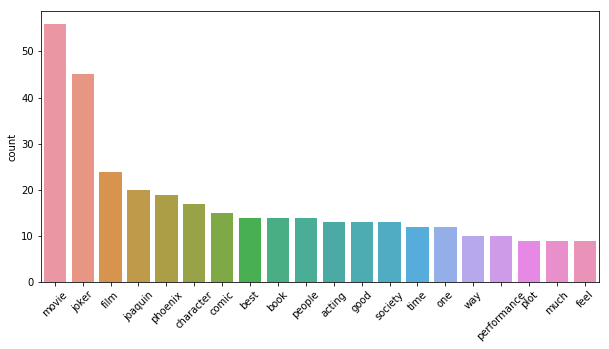

In [27]:
fig = plt.figure(figsize=(10,5))
sns.barplot(word_count_df.index[:20], word_count_df['count'][:20])
plt.xticks(rotation=45)

In [29]:
strings = ' '
joker_text = strings.join(joker)

In [27]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(STOPWORDS)
stopwords.update(['movie', 'film'])

def tfidf(text_file):    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True, lowercase=True)
    tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(text_file)
    return tfidf_vectorizer_vectors
    
def word_cloud(data):    
    wordcloud = WordCloud(max_font_size=50, stopwords=stopwords).generate(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    


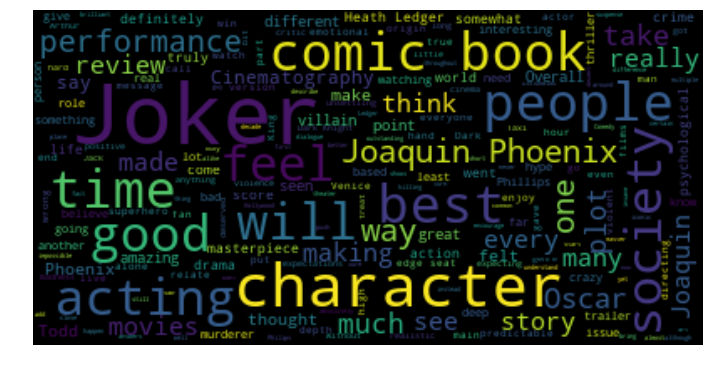

In [34]:
word_cloud(joker_text)

In [30]:
def retrive_url(url):
    page = requests.get(url)
#print(page.content)
    soup = BeautifulSoup(page.text, 'html.parser')
    reviews = soup.find_all('div', class_= ['text', 'show-more__control'])
    
    review_file = []
    clean_text = []
    for data in reviews:
        text = data.get_text().strip()
        text = text.lower()
        review_file.append(text)
        
    for line in review_file:
        if line not in string.punctuation:
            clean_text.append(line)
        
    str1 = ''
    return str1.join(clean_text), clean_text


In [31]:
#Imdb reviews only
source_file, clean_text = retrive_url('https://www.imdb.com/title/tt3829266/reviews?ref_=tt_ov_rt')
source_file


'this has to be the biggest pile of garbage i have seen in a long time. shane black has just killed the predator franchise. the plot makes no sense. the tone is all over the place. a genetic scientist suddenly becomes a super soldier. a vicious alien dog becomes friends with the good guys playing fetch (i\'m serious). the super predator looks like a pissed off wrestler with bad cgi. the harvesting human dna plot is handled ridiculously. the fact that an autistic kid can read predator language and is wanted by both predators is bloody bizarre. the jokes are constant and irritating that it\'s more of a comedy than a sci-fi thriller, actually it doesn\'t knoe what it is. ugh bloody awful, good fun if you\'re 7 years old i suppose. don\'t go near this nonsense. avp requiem is a masterpiece compared to this tripe.it is a parody of predator. don\'t expect science fiction or story line just a poor action comedy film.thank you , shane black has single-handedly destroyed a franchise.i am not jo

In [33]:
dummy_vector = tfidf(clean_text)

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  sorted(inconsistent))


In [34]:
dummy_vector.T.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.04095653,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.05662421],
        [0.        , 0.        , 0.        , ..., 0.        , 0.04621259,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

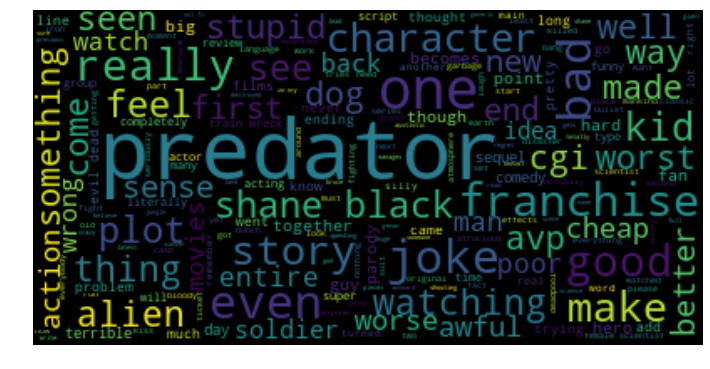

In [36]:
word_cloud(source_file)

In [38]:
from numpy import loadtxt
from keras.models import load_model


model = load_model('reviews.h5')

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of nump

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               56725900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 56,756,402
Trainable params: 56,756,402
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.predict(dummy_vector)

<25x2710 sparse matrix of type '<class 'numpy.float64'>'
	with 3309 stored elements in Compressed Sparse Row format>

In [40]:
tfidf_vectorizer_dummy = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True, lowercase=True)


In [44]:
tfidf_vectorizer_dummy.fit_transform(clean_text)

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\envs\tensorflowproject\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  sorted(inconsistent))


<25x2710 sparse matrix of type '<class 'numpy.float64'>'
	with 3309 stored elements in Compressed Sparse Row format>